In [112]:
import pandas as pd
import numpy as np

In [113]:
df = pd.read_csv('data/Bengaluru_House_Data.csv')

In [114]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [115]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [116]:
df.drop(columns=['availability','society'],inplace=True)

In [117]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [118]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [119]:
df.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [120]:
df.dropna(subset=['location','size'],inplace=True)

In [121]:
from sklearn.impute import SimpleImputer

In [122]:
imputer = SimpleImputer(strategy='median')

In [123]:
df['bath'] = imputer.fit_transform(df[['bath']])
df['balcony'] = imputer.fit_transform(df[['balcony']])

In [124]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [125]:
def getSize(size):
    return size.split(" ")[0]

In [126]:
df['size(BHK)'] = df['size'].apply(lambda x:getSize(x))

In [127]:
df.drop('size',axis=1,inplace=True)

In [128]:
df = df.reindex(columns=['area_type','location','total_sqft','size(BHK)','bath','balcony','price'])

In [129]:
df.location.nunique()

1304

In [130]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [131]:
location_stats = df.location.value_counts()

In [132]:
location_stats_less_than_15 = location_stats[location_stats<=15]

In [133]:
df['location'] = df['location'].apply(lambda x:"other" if x in location_stats_less_than_15 else x)

In [134]:
df['location'].nunique()

181

In [135]:
df

,area_type,location,total_sqft,size(BHK),bath,balcony,price
0,Super built-up Area,Electronic City Phase II,1056,2,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,2600,4,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,1440,3,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,1521,3,3.0,1.0,95.00
4,Super built-up Area,Kothanur,1200,2,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,5,4.0,0.0,231.00
13316,Super built-up Area,other,3600,4,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4689,4,4.0,1.0,488.00


### Outlier Removal

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 400.

In [136]:
df

,area_type,location,total_sqft,size(BHK),bath,balcony,price
0,Super built-up Area,Electronic City Phase II,1056,2,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,2600,4,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,1440,3,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,1521,3,3.0,1.0,95.00
4,Super built-up Area,Kothanur,1200,2,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,5,4.0,0.0,231.00
13316,Super built-up Area,other,3600,4,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4689,4,4.0,1.0,488.00


In [137]:
filt = df['total_sqft'].str.contains("-")

In [138]:
df[filt].count()

area_type     193
location      193
total_sqft    193
size(BHK)     193
bath          193
balcony       193
price         193
dtype: int64

In [139]:
df[filt]

,area_type,location,total_sqft,size(BHK),bath,balcony,price
30,Super built-up Area,Yelahanka,2100 - 2850,4,4.0,0.0,186.000
56,Built-up Area,Devanahalli,3010 - 3410,4,2.0,2.0,192.000
81,Built-up Area,Hennur Road,2957 - 3450,4,2.0,2.0,224.500
122,Super built-up Area,Hebbal,3067 - 8156,4,4.0,0.0,477.000
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2,2.0,0.0,54.005
...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,1804 - 2273,3,3.0,0.0,122.000
13059,Super built-up Area,Harlur,1200 - 1470,2,2.0,0.0,72.760
13240,Super built-up Area,Devanahalli,1020 - 1130,1,2.0,2.0,52.570
13265,Super built-up Area,Hoodi,1133 - 1384,2,2.0,0.0,59.135


In [140]:
def solve_total_sqft(area):
    x,y = area.split("-")
    return (float(x) + float(y))/2

In [141]:
df['total_sqft'] = df['total_sqft'].apply(lambda area : solve_total_sqft(area) if "-" in area else area)

In [142]:
df

,area_type,location,total_sqft,size(BHK),bath,balcony,price
0,Super built-up Area,Electronic City Phase II,1056,2,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,2600,4,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,1440,3,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,1521,3,3.0,1.0,95.00
4,Super built-up Area,Kothanur,1200,2,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,5,4.0,0.0,231.00
13316,Super built-up Area,other,3600,4,5.0,2.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4689,4,4.0,1.0,488.00


In [143]:
df['size(BHK)'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [144]:
df.dtypes

area_type      object
location       object
total_sqft     object
size(BHK)      object
bath          float64
balcony       float64
price         float64
dtype: object

In [145]:
df['size(BHK)'] = df['size(BHK)'].astype(float)
# filt = df['size(BHK)'].str.contains("-")
# df[filt]

In [146]:
df.dtypes

area_type      object
location       object
total_sqft     object
size(BHK)     float64
bath          float64
balcony       float64
price         float64
dtype: object

In [147]:
filt_metres = df['total_sqft'].str.contains("Sq",na=False)

In [148]:
df[filt_metres]

,area_type,location,total_sqft,size(BHK),bath,balcony,price
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,1.0,0.0,18.50
775,Built-up Area,other,1000Sq. Meter,1.0,2.0,1.0,93.00
872,Super built-up Area,other,1100Sq. Yards,2.0,2.0,2.0,45.00
1400,Super built-up Area,other,716Sq. Meter,9.0,9.0,1.0,296.00
1712,Plot Area,other,1500Sq. Meter,3.0,3.0,1.0,95.00
1743,Super built-up Area,Hosa Road,142.61Sq. Meter,3.0,3.0,1.0,115.00
1821,Plot Area,Sarjapur,1574Sq. Yards,3.0,3.0,1.0,76.00
2310,Super built-up Area,Whitefield,361.33Sq. Yards,4.0,4.0,2.0,270.00
2881,Built-up Area,other,117Sq. Yards,2.0,2.0,2.0,38.00
3228,Built-up Area,other,3040Sq. Meter,5.0,5.0,1.0,140.00


In [149]:
def yards_to_feet(yards):
    yard = yards.split("Sq")[0]
    return float(yard) * 9

In [150]:
def metres_to_feet(metres):
    metre = metres.split("Sq")[0]
    return float(metre) * 10.76

In [151]:
filt_yards = df['total_sqft'].str.contains("Yards",na=False)

In [152]:
filt_metres = df['total_sqft'].str.contains("Meter",na=False)

In [153]:
df_yards = df.loc[filt_yards,'total_sqft'].apply(lambda x : yards_to_feet(x))

In [154]:
df_metres = df.loc[filt_metres,'total_sqft'].apply(lambda x: metres_to_feet(x))

In [155]:
df.loc[filt_metres,'total_sqft'] = df_metres

In [156]:
df.loc[filt_yards, 'total_sqft'] = df_yards

In [157]:
df.loc[872]

area_type     Super built-up  Area
location                     other
total_sqft                  9900.0
size(BHK)                      2.0
bath                           2.0
balcony                        2.0
price                         45.0
Name: 872, dtype: object

In [158]:
df.dtypes

area_type      object
location       object
total_sqft     object
size(BHK)     float64
bath          float64
balcony       float64
price         float64
dtype: object

In [159]:
filt_perch = df['total_sqft'].str.contains("Perch",na=False)

In [160]:
df.loc[filt_perch,'total_sqft'] = 4125 * 272.25

In [161]:
df[filt_perch]

,area_type,location,total_sqft,size(BHK),bath,balcony,price
648,Built-up Area,Arekere,1123031.25,9.0,9.0,2.0,265.0


In [162]:
filt_acres = df['total_sqft'].str.contains("Acres",na=False)

In [163]:
def acres_to_feet(acres):
    acre_num = acres.removesuffix("Acres")
    return float(acre_num) * 43560

In [164]:
df.loc[filt_acres,'total_sqft'] = df.loc[filt_acres,'total_sqft'].apply(lambda x:acres_to_feet(x))

In [165]:
df[filt_acres]

,area_type,location,total_sqft,size(BHK),bath,balcony,price
1019,Plot Area,other,231303.6,1.0,1.0,0.0,110.0
1086,Plot Area,other,1306800.0,2.0,2.0,2.0,29.5
6333,Plot Area,other,91040.4,2.0,2.0,0.0,200.0
7334,Plot Area,Kanakpura Road,87120.0,1.0,1.0,0.0,125.0
7607,Plot Area,other,653400.0,3.0,3.0,1.0,217.0
7726,Plot Area,Kanakpura Road,54885.6,1.0,1.0,0.0,125.0
10488,Plot Area,other,54450.0,2.0,2.0,2.0,200.0
11615,Plot Area,other,261360.0,3.0,2.0,0.0,80.0


In [166]:
filt_cent = df['total_sqft'].str.contains("Cent",na=False)

In [167]:
df[filt_cent]

,area_type,location,total_sqft,size(BHK),bath,balcony,price
5453,Plot Area,other,3Cents,6.0,6.0,3.0,75.0
7001,Plot Area,other,1500Cents,8.0,6.0,2.0,290.0


In [168]:
def cent_to_feet(area):
    cent = area.removesuffix('Cents')
    return 435.56 * float(cent)

In [169]:
df.loc[filt_cent,'total_sqft'] = df.loc[filt_cent,'total_sqft'].apply(lambda x:cent_to_feet(x))

In [170]:
filt_guntha = df['total_sqft'].str.contains('Guntha',na=False)

In [171]:
def guntha_to_feet(area):
    guntha = area.removesuffix('Guntha')
    return float(guntha) * 1089

In [172]:
df.loc[filt_guntha,'total_sqft'] = df.loc[filt_guntha,'total_sqft'].apply(lambda x:guntha_to_feet(x))

In [173]:
df.loc[df['total_sqft'].str.contains("Ground", na=False),'total_sqft'] = 2400

In [174]:
df['total_sqft'] = df['total_sqft'].astype(float)

In [175]:
df['total_sqft_per_bedroom'] = df['total_sqft'] / df['size(BHK)']

In [176]:
df.head()

,area_type,location,total_sqft,size(BHK),bath,balcony,price,total_sqft_per_bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,2.0,1.0,39.07,528.0
1,Plot Area,Chikka Tirupathi,2600.0,4.0,5.0,3.0,120.00,650.0
2,Built-up Area,Uttarahalli,1440.0,3.0,2.0,3.0,62.00,480.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,3.0,1.0,95.00,507.0
4,Super built-up Area,Kothanur,1200.0,2.0,2.0,1.0,51.00,600.0


In [177]:
df = df[df['total_sqft_per_bedroom'] >= 400]

In [178]:
df

,area_type,location,total_sqft,size(BHK),bath,balcony,price,total_sqft_per_bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,2.0,1.0,39.07,528.00
1,Plot Area,Chikka Tirupathi,2600.0,4.0,5.0,3.0,120.00,650.00
2,Built-up Area,Uttarahalli,1440.0,3.0,2.0,3.0,62.00,480.00
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,3.0,1.0,95.00,507.00
4,Super built-up Area,Kothanur,1200.0,2.0,2.0,1.0,51.00,600.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,5.0,4.0,0.0,231.00,690.60
13316,Super built-up Area,other,3600.0,4.0,5.0,2.0,400.00,900.00
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,2.0,1.0,60.00,570.50
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,4.0,1.0,488.00,1172.25


In [179]:
df = df.copy()

In [180]:
df['price_per_sq_feet'] = (df.loc[:,'price'] * 100000 / df.loc[:,'total_sqft']).copy()

In [181]:
df

,area_type,location,total_sqft,size(BHK),bath,balcony,price,total_sqft_per_bedroom,price_per_sq_feet
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,2.0,1.0,39.07,528.00,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,4.0,5.0,3.0,120.00,650.00,4615.384615
2,Built-up Area,Uttarahalli,1440.0,3.0,2.0,3.0,62.00,480.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,3.0,1.0,95.00,507.00,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,2.0,1.0,51.00,600.00,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,5.0,4.0,0.0,231.00,690.60,6689.834926
13316,Super built-up Area,other,3600.0,4.0,5.0,2.0,400.00,900.00,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,2.0,1.0,60.00,570.50,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,4.0,1.0,488.00,1172.25,10407.336319


In [182]:
df['price_per_sq_feet'].nlargest(10)

7657     176470.588235
7088      76923.076923
6421      76530.612245
12443     59770.114943
8398      56000.000000
7883      53150.000000
9535      52083.333333
13067     50349.650350
9195      47994.652406
9737      47619.047619
Name: price_per_sq_feet, dtype: float64

In [183]:
df['price_per_sq_feet'].nsmallest(10)

1086       2.257423
648       23.596850
11615     30.609122
7607      33.210897
7001      44.387302
1019      47.556545
7334     143.480257
6333     219.682690
7726     227.746440
1894     267.829813
Name: price_per_sq_feet, dtype: float64

### Now due to huge variation we neglect some values

In [184]:
mean = df.price_per_sq_feet.mean()
std = df.price_per_sq_feet.std()

In [185]:
print(mean)
print(std)

6173.840946916466
4004.3937257122625


In [186]:
df = df[(df['price_per_sq_feet'] >= (mean-std)) & (df['price_per_sq_feet']<=(mean+std))].copy()

In [187]:
df

,area_type,location,total_sqft,size(BHK),bath,balcony,price,total_sqft_per_bedroom,price_per_sq_feet
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,2.0,1.0,39.07,528.000000,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,4.0,5.0,3.0,120.00,650.000000,4615.384615
2,Built-up Area,Uttarahalli,1440.0,3.0,2.0,3.0,62.00,480.000000,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,3.0,1.0,95.00,507.000000,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,2.0,1.0,51.00,600.000000,4250.000000
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Uttarahalli,1345.0,3.0,2.0,1.0,57.00,448.333333,4237.918216
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,3.0,112.00,571.666667,6530.612245
13315,Built-up Area,Whitefield,3453.0,5.0,4.0,0.0,231.00,690.600000,6689.834926
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,2.0,1.0,60.00,570.500000,5258.545136


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have **total bath = total bed + 1 max.** Anything above that is an outlier or a data error and can be removed

In [188]:
df = df[df['size(BHK)'] + 1 >= df['bath']].copy()

## Plotting for the same location

In [189]:
from matplotlib import pyplot as plt

In [190]:
def plot_scatter(axis,df,location):
    bhk2 = df[(df['size(BHK)'] == 2) & (df['location'] == location)]
    bhk3 = df[(df['size(BHK)'] == 3) & (df['location'] == location)]
    axis.scatter(bhk2['total_sqft'],bhk2['price'],color="red",marker="o",label="2BHK")
    axis.scatter(bhk3['total_sqft'],bhk3['price'],color="blue",marker="+",label="3BHK")
    axis.set_xlabel("Total Square Feet")
    axis.set_ylabel("Price")
    axis.set_title(location)
    axis.legend()

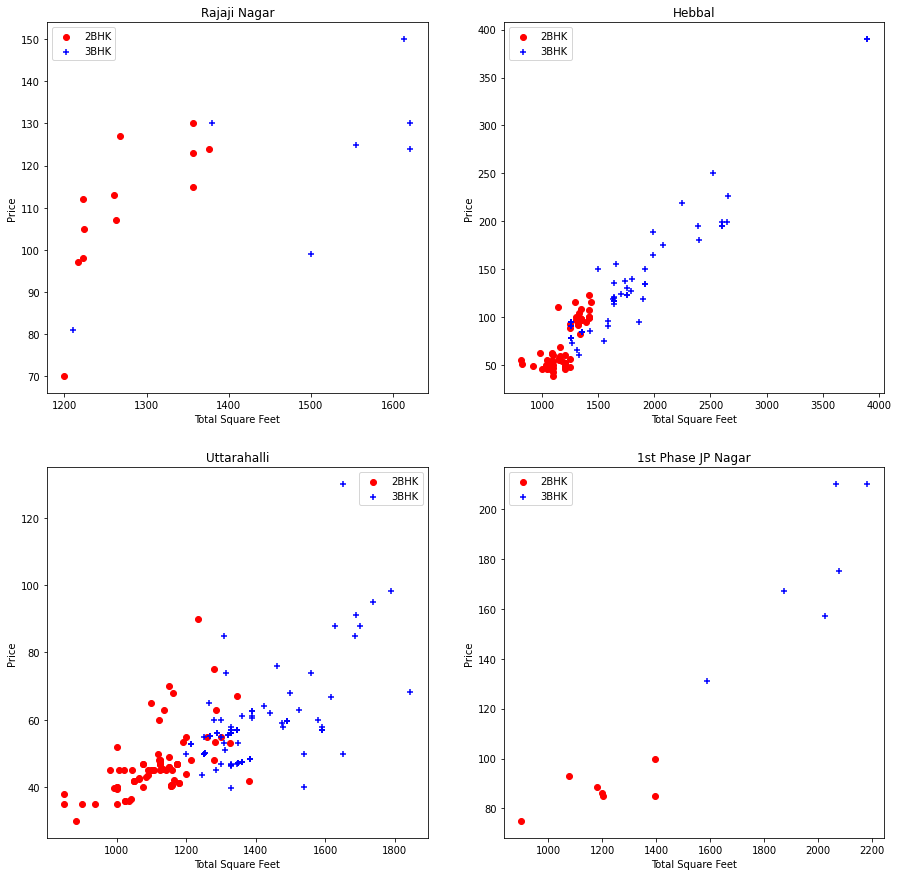

In [191]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
plot_scatter(ax1,df,"Rajaji Nagar")
plot_scatter(ax2,df,"Hebbal")
plot_scatter(ax3,df,"Uttarahalli")
plot_scatter(ax4,df,"1st Phase JP Nagar")
plt.show()

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

In [192]:
df['size(BHK)'].unique()

array([ 2.,  4.,  3.,  1.,  6.,  8.,  5.,  7., 11.,  9., 16., 13., 10.])

In [193]:
grp = df.groupby(['location'])

In [194]:
print(grp)

In [195]:
grp['size(BHK)']

In [196]:
df['bath'] = df['bath'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')

In [197]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('size(BHK)'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sq_feet),
                'std': np.std(bhk_df.price_per_sq_feet),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('size(BHK)'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sq_feet<(stats['mean'])].index.values)
    return df.drop(exclude_indices)

In [198]:
df = remove_bhk_outliers(df).copy()

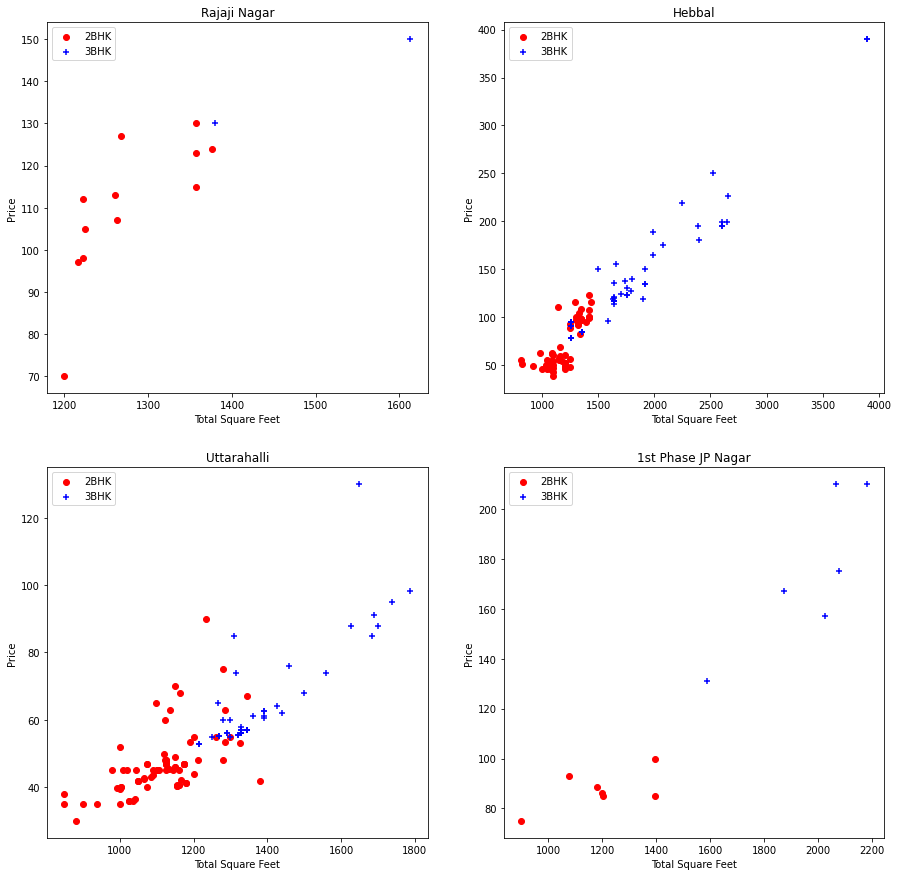

In [199]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
plot_scatter(ax1,df,"Rajaji Nagar")
plot_scatter(ax2,df,"Hebbal")
plot_scatter(ax3,df,"Uttarahalli")
plot_scatter(ax4,df,"1st Phase JP Nagar")
plt.show()

In [200]:
# Removing features which are not important
df.drop(['balcony','area_type','total_sqft_per_bedroom','price_per_sq_feet'],axis=1,inplace=True)

In [201]:
df

,location,total_sqft,size(BHK),bath,price
0,Electronic City Phase II,1056.0,2.0,2,39.07
2,Uttarahalli,1440.0,3.0,2,62.00
3,Lingadheeranahalli,1521.0,3.0,3,95.00
4,Kothanur,1200.0,2.0,2,51.00
6,Old Airport Road,2732.0,4.0,4,204.00
...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,2,47.00
13313,Uttarahalli,1345.0,3.0,2,57.00
13314,Green Glen Layout,1715.0,3.0,3,112.00
13317,Raja Rajeshwari Nagar,1141.0,2.0,2,60.00


In [202]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [203]:
from sklearn.compose import make_column_transformer

In [204]:
X = df.drop(columns=['price'])
y = df.price

In [205]:
num_cols = X.select_dtypes(np.number).columns.to_list()
cat_cols = X.select_dtypes('object').columns.to_list()

In [206]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False,handle_unknown='ignore'),cat_cols),(MinMaxScaler(),num_cols),remainder='passthrough')

In [207]:
column_trans.fit_transform(X)

array([[0.        , 0.        , 0.        , ..., 0.02186667, 0.06666667,
        0.06666667],
       [0.        , 0.        , 0.        , ..., 0.03466667, 0.13333333,
        0.06666667],
       [0.        , 0.        , 0.        , ..., 0.03736667, 0.13333333,
        0.13333333],
       ...,
       [0.        , 0.        , 0.        , ..., 0.04383333, 0.13333333,
        0.13333333],
       [0.        , 0.        , 0.        , ..., 0.0247    , 0.06666667,
        0.06666667],
       [0.        , 0.        , 0.        , ..., 0.005     , 0.        ,
        0.        ]])

In [208]:
from sklearn.pipeline import make_pipeline

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [210]:
algos = {
    'linear_regression': {
        'model':LinearRegression(),
        'param_grid':{
            
        }
    },
    'lasso': {
        'model': Lasso(),
        'param_grid': {
            'lasso__alpha':[1,2],
            'lasso__selection':['random','cyclic']
        }
    },
    'tree_regressor': {
        'model':DecisionTreeRegressor(),
        'param_grid': {
            'decisiontreeregressor__criterion':['squared_error','friedman_mse'],
            'decisiontreeregressor__splitter':['best','random']
        }
    }
}

In [211]:
for algo,algo1 in algos.items():
    print(algo1['param_grid'])

{}
{'lasso__alpha': [1, 2], 'lasso__selection': ['random', 'cyclic']}
{'decisiontreeregressor__criterion': ['squared_error', 'friedman_mse'], 'decisiontreeregressor__splitter': ['best', 'random']}


In [212]:
from sklearn.model_selection import GridSearchCV

In [213]:
scores = []

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [216]:
for algo_name,algo in algos.items():
    pipe = make_pipeline(column_trans,algo['model'])
    grid = GridSearchCV(pipe,algo['param_grid'],cv=5,return_train_score=False)
    grid.fit(X_train,y_train)
    scores.append({
            'model': algo_name,
            'best_score': grid.best_score_,
            'best_params': grid.best_params_
        })

In [217]:
scores

[{'model': 'linear_regression',
  'best_score': 0.8837833448301815,
  'best_params': {}},
 {'model': 'lasso',
  'best_score': 0.657051056074674,
  'best_params': {'lasso__alpha': 1, 'lasso__selection': 'random'}},
 {'model': 'tree_regressor',
  'best_score': 0.8391317778449547,
  'best_params': {'decisiontreeregressor__criterion': 'squared_error',
   'decisiontreeregressor__splitter': 'best'}}]

## Best Model is Linear Regression

In [218]:
df[df.location=='Indira Nagar']

,location,total_sqft,size(BHK),bath,price
663,Indira Nagar,2200.0,4.0,4,200.0
1002,Indira Nagar,1200.0,2.0,2,93.0
1128,Indira Nagar,1128.0,2.0,2,105.0
3249,Indira Nagar,1875.0,3.0,3,180.0
3260,Indira Nagar,1210.0,2.0,2,102.0
3308,Indira Nagar,1224.0,2.0,2,105.0
4795,Indira Nagar,1145.0,2.0,2,100.0
5573,Indira Nagar,850.0,1.0,1,57.0
6468,Indira Nagar,1260.0,2.0,2,100.0
7492,Indira Nagar,1700.0,3.0,3,150.0


In [219]:
grid.predict(df[df.location=='Indira Nagar'])

array([200. ,  60. , 105. , 180. ,  50. ,  60. , 100. ,  57. , 110. ,
       109.6,  57. , 110. , 110.5])

## Export the tested model to a pickle file

In [220]:
import pickle 

In [221]:
pickle.dump(linreg,open('banglore_home_prices_model.pickle','wb'))

NameError: name 'linreg' is not defined

## Export location and column information to a file that will be useful later on in our prediction application

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))